In [1]:
import os
import numpy as np
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
import fiftyone as fo
import fiftyone.zoo as foz

%matplotlib inline

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


### Download COCO Dataset

In [30]:
# train
# validation: 1000
# test: 1000


ds_coco_train = foz.load_zoo_dataset(
    "coco-2017",
    splits="train",
    classes=["cat", "dog", "horse"],
    only_matching=True,
    label_types=["detetctions"],
    max_samples=10000
)

print(len(ds_coco_train))
ds_coco_train.first()

Found annotations at '/Users/mlstudio/fiftyone/coco-2017/raw/instances_train2017.json'
6861 images found; downloading the remaining 3139
 100% |████████████████| 3139/3139 [1.6m elapsed, 0s remaining, 31.2 images/s]      
Writing annotations for 19263 downloaded samples to '/Users/mlstudio/fiftyone/coco-2017/train/labels.json'
Dataset info written to '/Users/mlstudio/fiftyone/coco-2017/info.json'
Loading existing dataset 'coco-2017-train-10000'. To reload from disk, either delete the existing dataset or provide a custom `dataset_name` to use
10000


<Sample: {
    'id': '667748e437a54ca4ca622f94',
    'media_type': 'image',
    'filepath': '/Users/mlstudio/fiftyone/coco-2017/train/data/000000001315.jpg',
    'tags': ['train'],
    'metadata': <ImageMetadata: {
        'size_bytes': None,
        'mime_type': None,
        'width': 480,
        'height': 640,
        'num_channels': None,
    }>,
    'ground_truth': <Detections: {
        'detections': [
            <Detection: {
                'id': '667748e437a54ca4ca622f8b',
                'attributes': {},
                'tags': [],
                'label': 'bicycle',
                'bounding_box': [
                    0.9574374999999999,
                    0.55921875,
                    0.042562499999999996,
                    0.10275000000000001,
                ],
                'mask': None,
                'confidence': None,
                'index': None,
                'supercategory': 'vehicle',
                'iscrowd': 0,
            }>,
            <Detect

(array([5.583e+03, 1.692e+03, 1.078e+03, 1.034e+03, 3.300e+02, 1.820e+02,
        6.900e+01, 2.200e+01, 7.000e+00, 3.000e+00]),
 array([ 1. ,  5.2,  9.4, 13.6, 17.8, 22. , 26.2, 30.4, 34.6, 38.8, 43. ]),
 <BarContainer object of 10 artists>)

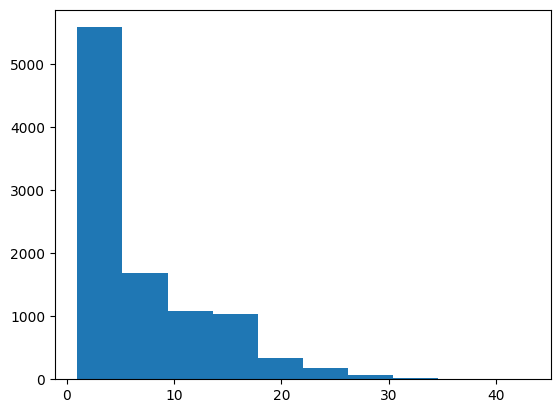

In [10]:
plt.hist([
    len(sample["ground_truth.detections"])
    for sample in ds_coco_train
])


In [17]:
from fiftyone import ViewField as F

num_objs = F("detections").length()

num_objs

{'$size': {'$ifNull': ['$detections', []]}}

In [27]:
view = ds_coco_train.match(
    F("ground_truth.detections.label").length() == 1
)

view

Dataset:     coco-2017-train-10000
Media type:  image
Num samples: 1888
Sample fields:
    id:           fiftyone.core.fields.ObjectIdField
    filepath:     fiftyone.core.fields.StringField
    tags:         fiftyone.core.fields.ListField(fiftyone.core.fields.StringField)
    metadata:     fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.metadata.ImageMetadata)
    ground_truth: fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.labels.Detections)
View stages:
    1. Match(filter={'$expr': {'$eq': [...]}})

Connected to FiftyOne on port 5151 at localhost.
If you are not connecting to a remote session, you may need to start a new session and specify a port



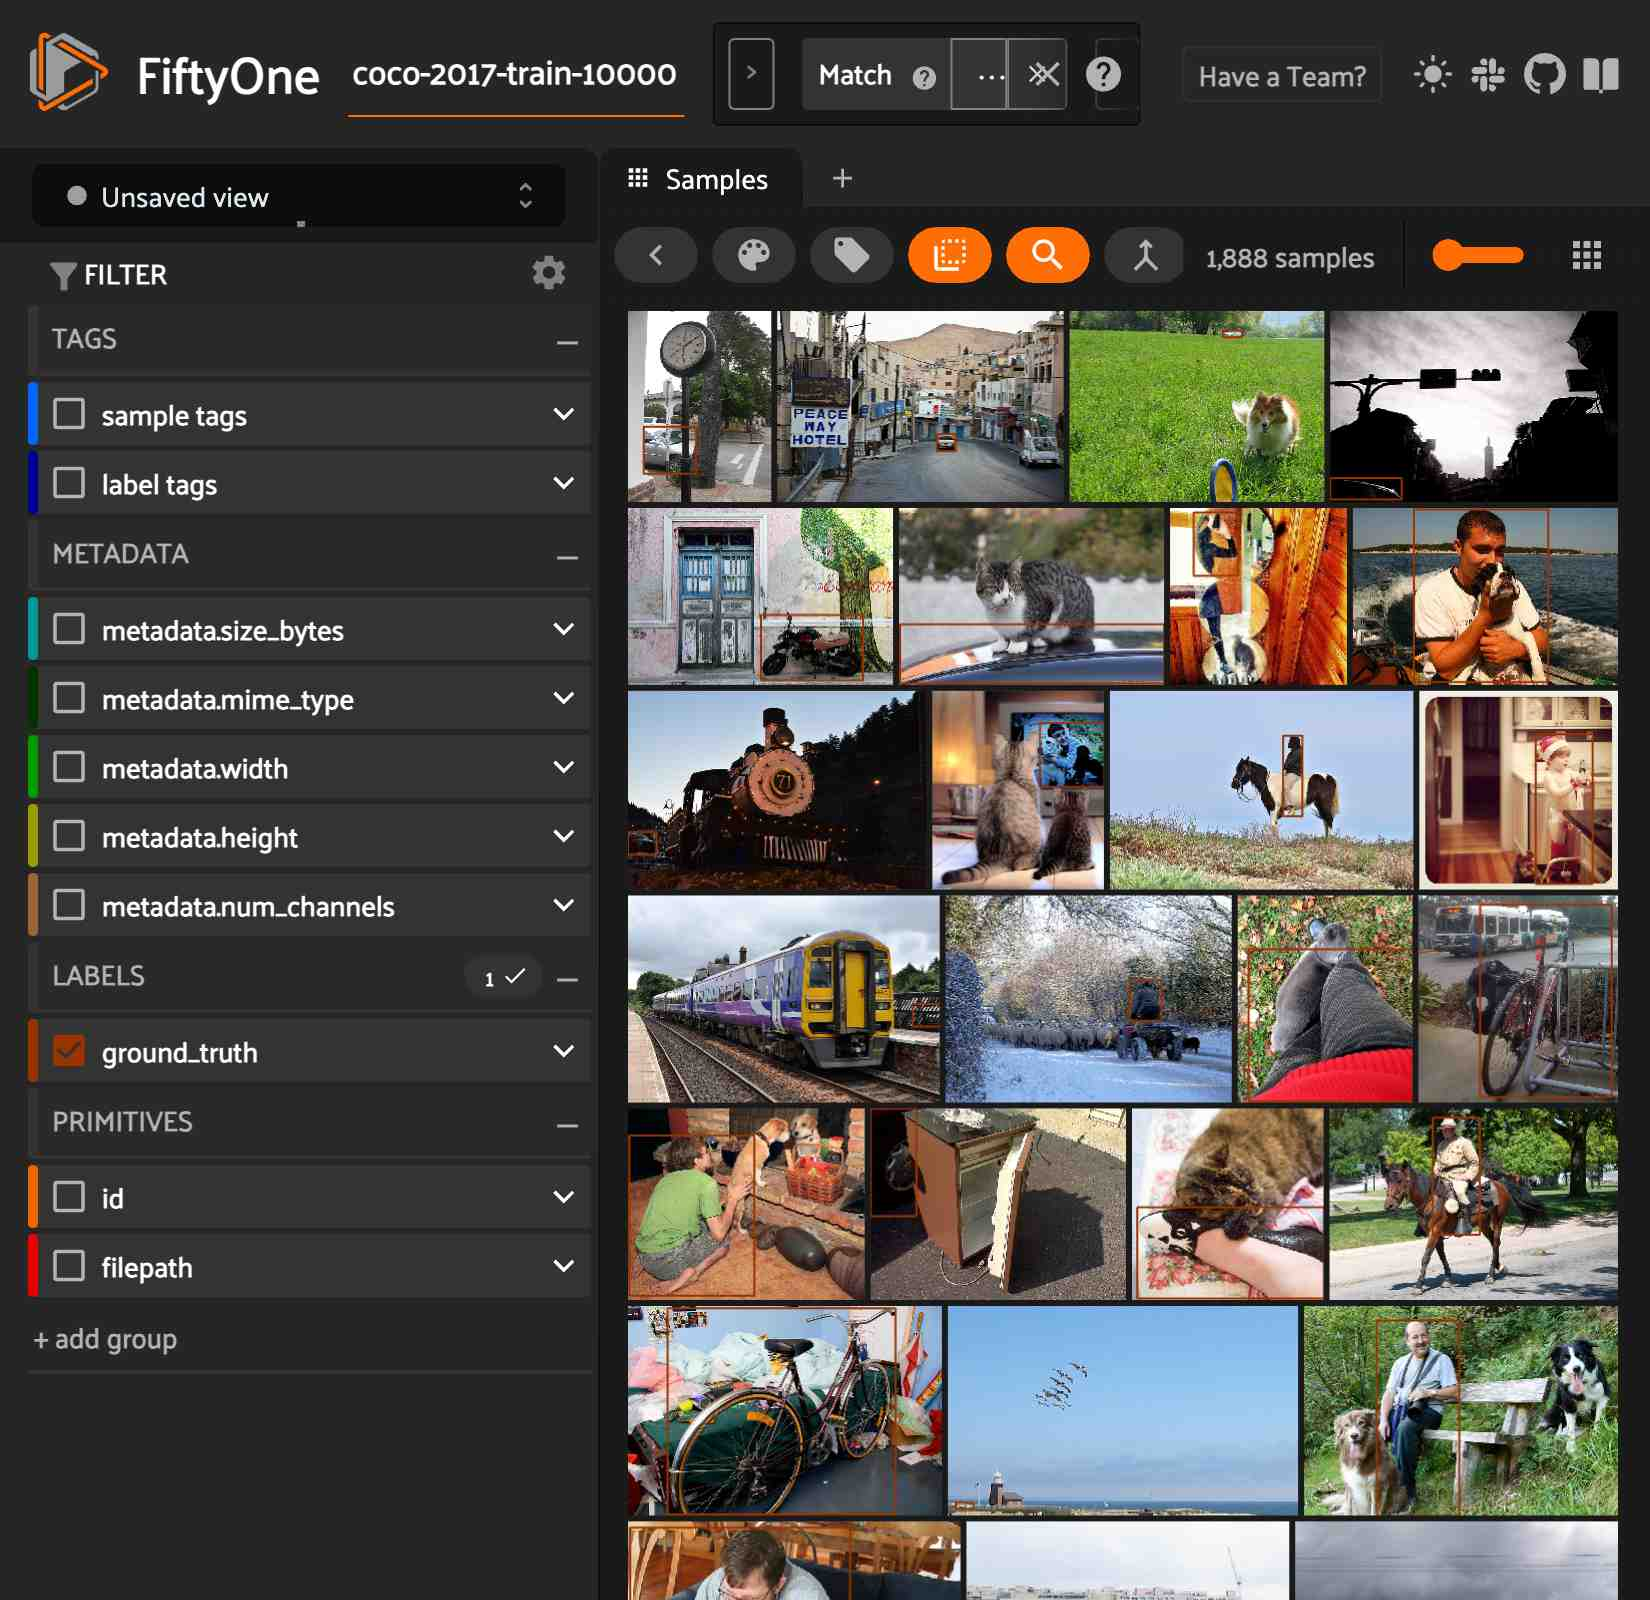

Dataset:          coco-2017-train-10000
Media type:       image
Num samples:      1888
Selected samples: 0
Selected labels:  0
Session URL:      http://localhost:5151/
View stages:
    1. Match(filter={'$expr': {'$eq': [...]}})

In [28]:
fo.launch_app(view)


In [11]:
# train: 10000
# validation: 1000
# test: 1000
ds_coco_valid = foz.load_zoo_dataset(
    "coco-2017",
    splits="validation",
    classes=["car", "motorcycle", "bicycle", "person"],
    only_matching=True,
    label_types=["detections", "segmentations"],
    max_samples=1000
)

len(ds_coco_valid)

Found annotations at '/Users/mlstudio/fiftyone/coco-2017/raw/instances_val2017.json'
Sufficient images already downloaded
Existing download of split 'validation' is sufficient
Loading existing dataset 'coco-2017-validation-1000'. To reload from disk, either delete the existing dataset or provide a custom `dataset_name` to use


1000

In [13]:
# train
# validation: 1000
# test: 1000
ds_coco_test = foz.load_zoo_dataset(
    "coco-2017",
    splits="test",
    classes=["car", "motorcycle", "bicycle", "person"],
    only_matching=True,
    label_types=["detections", "segmentations"],
    max_samples=1000
)

len(ds_coco_test)

Test split is unlabeled; ignoring classes requirement
Found test info at '/Users/mlstudio/fiftyone/coco-2017/raw/image_info_test2017.json'
Sufficient images already downloaded
Existing download of split 'test' is sufficient
Loading existing dataset 'coco-2017-test-1000'. To reload from disk, either delete the existing dataset or provide a custom `dataset_name` to use


1000

In [3]:
ds_coco_train.head(1)

[<Sample: {
     'id': '667748e437a54ca4ca622f94',
     'media_type': 'image',
     'filepath': '/Users/mlstudio/fiftyone/coco-2017/train/data/000000001315.jpg',
     'tags': ['train'],
     'metadata': <ImageMetadata: {
         'size_bytes': None,
         'mime_type': None,
         'width': 480,
         'height': 640,
         'num_channels': None,
     }>,
     'ground_truth': <Detections: {
         'detections': [
             <Detection: {
                 'id': '667748e437a54ca4ca622f8b',
                 'attributes': {},
                 'tags': [],
                 'label': 'bicycle',
                 'bounding_box': [
                     0.9574374999999999,
                     0.55921875,
                     0.042562499999999996,
                     0.10275000000000001,
                 ],
                 'mask': None,
                 'confidence': None,
                 'index': None,
                 'supercategory': 'vehicle',
                 'iscrowd': 0,
     

In [6]:
ds2 = foz.load_zoo_dataset(
    "coco-2017",
    split="train",
    classes=["car", "motorcycle", "bicycle", "person"],
    only_matching=True,
    max_samples=50,
    dataset_name="tutorial"
)

len(ds)

Found annotations at '/Users/mlstudio/fiftyone/coco-2017/raw/instances_train2017.json'
Sufficient images already downloaded
Existing download of split 'train' is sufficient
Loading 'coco-2017' split 'train'
 100% |███████████████████| 50/50 [247.8ms elapsed, 0s remaining, 201.8 samples/s]     
Dataset 'tutorial' created


50

In [7]:
ds2.first()

<Sample: {
    'id': '6673a73ab7d458bd1d028820',
    'media_type': 'image',
    'filepath': '/Users/mlstudio/fiftyone/coco-2017/train/data/000000001315.jpg',
    'tags': ['train'],
    'metadata': <ImageMetadata: {
        'size_bytes': None,
        'mime_type': None,
        'width': 480,
        'height': 640,
        'num_channels': None,
    }>,
    'ground_truth': <Detections: {
        'detections': [
            <Detection: {
                'id': '6673a73ab7d458bd1d028817',
                'attributes': {},
                'tags': [],
                'label': 'bicycle',
                'bounding_box': [
                    0.9574374999999999,
                    0.55921875,
                    0.042562499999999996,
                    0.10275000000000001,
                ],
                'mask': None,
                'confidence': None,
                'index': None,
                'supercategory': 'vehicle',
                'iscrowd': 0,
            }>,
            <Detect

In [11]:
fo.Classification(label="cat") #["cat", "dog"])

<Classification: {
    'id': '6673a7b8b7d458bd1d028b9b',
    'tags': [],
    'label': 'cat',
    'confidence': None,
    'logits': None,
}>

In [ ]:
fo.MultiLa